## Setup

In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os

sys.path.append('../scripts')
import pandas as pd
from data_loader import load_mics_data
from data_cleaner import merge_mics_data, create_target_variables, extract_features, impute_missing_values
from utils import ensure_dir

raw_dir = '../data/raw'
processed_dir = '../data/processed'
ensure_dir(processed_dir)

## Load Data

In [2]:
df_child, df_women, df_household = load_mics_data(raw_dir)

In [3]:
# Only keep relevant columns in each df
df_child = df_child[['HH1', 'HAZ', 'AN4', 'EC6', 'EC7', 'EC8', 'EC9', 'EC10', 'EC11', 'EC12', 'EC13', 'EC14', 'EC15', 'BD2', 'BD3', 'CA1']]
df_women = df_women[['HH1', 'WB6A', 'WB6B', 'WAGE', 'MN5', 'WB14', 'MN34']]
df_household = df_household[['HH1', 'windex5', 'HH48', 'WS1', 'WS4']]

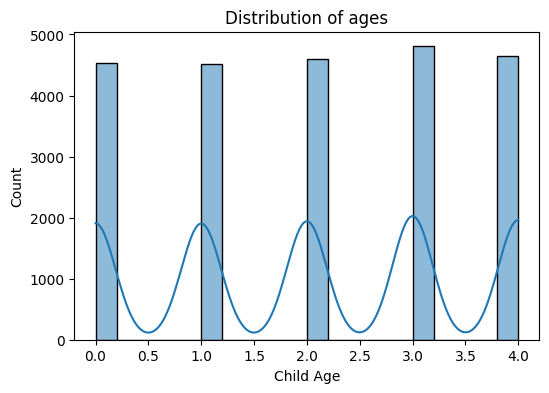

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.histplot(df_child['AN4'], kde=True, bins=20)
plt.title(f"Distribution of ages")
plt.ylabel('Count')
plt.xlabel('Child Age')
plt.show()

## Merge Data

In [4]:
df_merged = merge_mics_data(df_child, df_women, df_household)
df_target = create_target_variables(df_merged)

In [5]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10820820 entries, 0 to 10820819
Data columns (total 29 columns):
 #   Column        Dtype   
---  ------        -----   
 0   HH1           float64 
 1   HAZ           float64 
 2   AN4           float64 
 3   EC6           float64 
 4   EC7           float64 
 5   EC8           float64 
 6   EC9           float64 
 7   EC10          float64 
 8   EC11          float64 
 9   EC12          float64 
 10  EC13          category
 11  EC14          float64 
 12  EC15          float64 
 13  BD2           category
 14  BD3           category
 15  CA1           category
 16  WB6A          category
 17  WB6B          category
 18  WAGE          category
 19  MN5           category
 20  WB14          category
 21  MN34          category
 22  WS1           category
 23  WS4           category
 24  HH48          float64 
 25  windex5       category
 26  stunted       int32   
 27  ecd_i_count   float64 
 28  ecd_on_track  int32   
dtypes: category(

In [6]:
df_target.describe().T

,count,mean,std,min,25%,50%,75%,max
HH1,10820820.0,1591.220124,974.971713,1.00,695.00,1517.00,2476.00,3220.00
HAZ,10115820.0,-0.739214,2.477369,-9.98,-1.87,-1.09,-0.25,9.99
AN4,10116220.0,2.020500,1.412103,0.00,1.00,2.00,3.00,4.00
EC6,4120700.0,0.291145,0.454290,0.00,0.00,0.00,1.00,1.00
EC7,4127980.0,0.310074,0.462524,0.00,0.00,0.00,1.00,1.00
EC8,4127900.0,0.297648,0.457224,0.00,0.00,0.00,1.00,1.00
EC9,4119560.0,0.920700,0.270206,0.00,1.00,1.00,1.00,1.00
EC10,4130940.0,0.233816,0.423257,0.00,0.00,0.00,0.00,1.00
EC11,4131360.0,0.861382,0.345547,0.00,1.00,1.00,1.00,1.00
EC12,4132920.0,0.851635,0.355461,0.00,1.00,1.00,1.00,1.00


## Summarize Missingness

In [7]:
cat_cols = ['BD2', 'BD3', 'CA1', 'WB6A', 'WB6B', 'WAGE', 'MN5', 'WB14', 'MN34', 'windex5', 'WS1', 'WS4']

for col in cat_cols:
    print(f"\n--- {col} ---")
    print(df_target[col].value_counts(dropna=False))


--- BD2 ---
BD2
YES    5721900
NaN    4837620
NO      260080
DK        1220
Name: count, dtype: int64

--- BD3 ---
BD3
NaN    5098920
YES    4734700
NO      986840
DK         360
Name: count, dtype: int64

--- CA1 ---
CA1
NO             9418700
NaN             704320
YES             691820
DK                5680
NO RESPONSE        300
Name: count, dtype: int64

--- WB6A ---
WB6A
SECONDARY/ HIGHER SECONDARY    3333280
PRIMARY                        2349500
NaN                            2335260
LOWER SECONDARY                2093340
HIGHER                          687040
ECE                              22400
Name: count, dtype: int64

--- WB6B ---
WB6B
NaN                             2357660
SSC/Dakhil                      1675560
GRADE 5                         1415100
GRADE 8                         1041100
GRADE 9                          751780
HSC/Alim/Diploma/Polytechnic     670380
GRADE 7                          613140
GRADE 6                          439100
GRADE 3           

In [8]:
missing_summary = df_target.isnull().sum().sort_values(ascending=False)
missing_pct = (missing_summary / len(df_target)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_summary,
    'Missing %': missing_pct
})

missing_df[missing_df['Missing Count'] > 0]

,Missing Count,Missing %
MN34,10017220,92.573576
MN5,9472220,87.536989
WS4,8605091,79.523465
WB14,6813180,62.963620
EC9,6701260,61.929318
EC6,6700120,61.918782
EC15,6696420,61.884589
EC8,6692920,61.852244
EC7,6692840,61.851505
EC10,6689880,61.824150


## Extract Features for Modeling

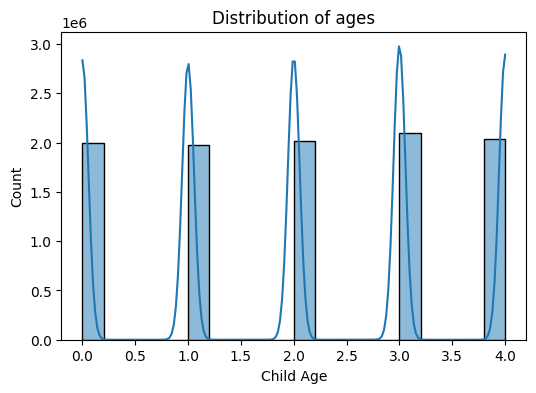

In [17]:
df_model = extract_features(df_target)
plt.figure(figsize=(6,4))
sns.histplot(df_model['AN4'], kde=True, bins=20)
plt.title(f"Distribution of ages")
plt.ylabel('Count')
plt.xlabel('Child Age')
plt.show()

In [20]:
# drop rows missing more than 50% of selected columns
threshold = int(0.4 * len(df_model.columns))
df_cleaned = df_model.dropna(thresh=(len(df_model.columns) - threshold))

print(f"Original rows: {len(df_model)}")
print(f"Rows after dropping high-missing: {len(df_cleaned)}")

Original rows: 10820820
Rows after dropping high-missing: 4131537


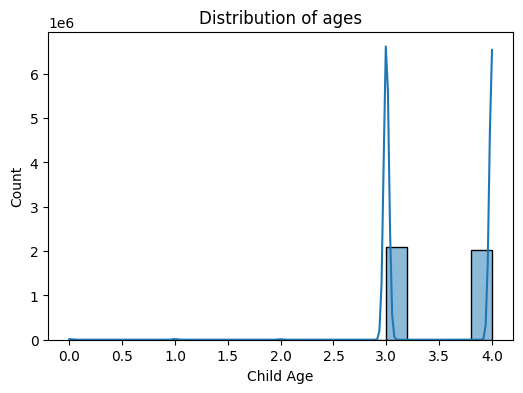

In [21]:
plt.figure(figsize=(6,4))
sns.histplot(df_cleaned['AN4'], kde=True, bins=20)
plt.title(f"Distribution of ages")
plt.ylabel('Count')
plt.xlabel('Child Age')
plt.show()

## Drop Features with High Missingness

In [11]:
drop_features = ['MN34', 'MN5', 'WS4']
df_cleaned.drop(drop_features, axis=1, inplace=True)
df_cleaned.head()

C:\Users\vscerra\AppData\Local\Temp\ipykernel_1220\1873568886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(drop_features, axis=1, inplace=True)


,AN4,EC6,EC7,EC8,EC9,EC10,EC11,EC12,EC13,EC14,...,WAGE,WB14,windex5,HH48,WS1,BD2,BD3,CA1,stunted,ecd_on_track
0,4.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1,0.0,...,20-24,NaN,Richest,4.0,TUBE WELL / BOREHOLE,NaN,NaN,NO,0,1
1,4.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1,0.0,...,20-24,NaN,Middle,3.0,TUBE WELL / BOREHOLE,NaN,NaN,NO,0,1
2,4.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1,0.0,...,20-24,NaN,Middle,3.0,TUBE WELL / BOREHOLE,NaN,NaN,NO,0,1
3,4.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1,0.0,...,20-24,NaN,Middle,2.0,TUBE WELL / BOREHOLE,NaN,NaN,NO,0,1
4,4.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1,0.0,...,20-24,NaN,Fourth,3.0,TUBE WELL / BOREHOLE,NaN,NaN,NO,0,1


In [12]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3763450 entries, 0 to 10819819
Data columns (total 23 columns):
 #   Column        Dtype   
---  ------        -----   
 0   AN4           float64 
 1   EC6           float64 
 2   EC7           float64 
 3   EC8           float64 
 4   EC9           float64 
 5   EC10          float64 
 6   EC11          float64 
 7   EC12          float64 
 8   EC13          category
 9   EC14          float64 
 10  EC15          float64 
 11  WB6A          category
 12  WB6B          category
 13  WAGE          category
 14  WB14          category
 15  windex5       category
 16  HH48          float64 
 17  WS1           category
 18  BD2           category
 19  BD3           category
 20  CA1           category
 21  stunted       int32   
 22  ecd_on_track  int32   
dtypes: category(10), float64(11), int32(2)
memory usage: 409.2 MB


## Impute Remaining Missing Values

Use median for numerical columns and mode for categorical columns

In [13]:
df_imputed = impute_missing_values(df_cleaned.copy())

## Save the Cleaned and Imputed Dataset

In [14]:
save_path = os.path.join('..', 'data', 'processed')
df_imputed.to_csv(os.path.join(save_path, "df_imputed.csv"), index = False)
df_imputed.head(10)

,AN4,EC6,EC7,EC8,EC9,EC10,EC11,EC12,EC13,EC14,...,WAGE,WB14,windex5,HH48,WS1,BD2,BD3,CA1,stunted,ecd_on_track
0,4.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1,0.0,...,20-24,CANNOT READ AT ALL,Richest,4.0,TUBE WELL / BOREHOLE,NaN,NaN,NO,0,1
1,4.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1,0.0,...,20-24,CANNOT READ AT ALL,Middle,3.0,TUBE WELL / BOREHOLE,NaN,NaN,NO,0,1
2,4.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1,0.0,...,20-24,CANNOT READ AT ALL,Middle,3.0,TUBE WELL / BOREHOLE,NaN,NaN,NO,0,1
3,4.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1,0.0,...,20-24,CANNOT READ AT ALL,Middle,2.0,TUBE WELL / BOREHOLE,NaN,NaN,NO,0,1
4,4.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1,0.0,...,20-24,CANNOT READ AT ALL,Fourth,3.0,TUBE WELL / BOREHOLE,NaN,NaN,NO,0,1
5,4.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1,0.0,...,20-24,CANNOT READ AT ALL,Middle,4.0,TUBE WELL / BOREHOLE,NaN,NaN,NO,0,1
6,4.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1,0.0,...,20-24,CANNOT READ AT ALL,Richest,5.0,TUBE WELL / BOREHOLE,NaN,NaN,NO,0,1
7,4.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1,0.0,...,20-24,CANNOT READ AT ALL,Richest,4.0,TUBE WELL / BOREHOLE,NaN,NaN,NO,0,1
8,4.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1,0.0,...,20-24,CANNOT READ AT ALL,Richest,3.0,TUBE WELL / BOREHOLE,NaN,NaN,NO,0,1
9,4.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1,0.0,...,20-24,CANNOT READ AT ALL,Richest,3.0,TUBE WELL / BOREHOLE,NaN,NaN,NO,0,1
